In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
from pygments import highlight
from google_play_scraper import Sort, reviews, app, reviews_all
%matplotlib inline 

### Scrape the App Reviews and App information from the Play Store and download them

In [2]:
#Select and make a list of App IDs
app_packages = [
    'com.slt.selfcare',
    'lk.slt.selfcare',
    'com.mobitel.selfcare',
    'net.omobio.dialogsc',
    'lk.etisalat.cloud.fwd.smpl',
    'com.omobio.etisalatone',
    'com.tsdc.selfcare'    
]

In [3]:
#Get all the app information
app_info = []
for aps in tqdm(app_packages):
    info = app(aps, country='lk' )
    app_info.append(info)

100%|██████████| 7/7 [00:12<00:00,  1.80s/it]


In [4]:
app_info[0]

{'title': 'MySLT',
 'description': 'MySLT self-care app gives you full control on managing your SLT account, postpaid online bill payments, requesting new service and package upgrades, tracking your data usage, reporting faults, obtaining bill summaries are some of the key features of the MySLT self-care app. \r\n\r\nDetail descriptions on the available services via MySLT selfcare app are as follows,\r\n>Easy registration process with minimum clicks. \r\n>Track your real-time data usage, daily usage details, Protocolwise detailed data reporting, Package quota details, obtaining value-added services. \r\n>View your current bill summary and payment details.\r\n>Register to ebill facility to obtain bills online. \r\n>Activate new data bundles, Upgrade packages and request new additional services.\r\n>Pay your SLT bill via Debit or Credit card.\r\n>Check FAQ to obtain answers to your questions related to SLT services. \r\n>Report issues related to your connection and keep track of your que

In [5]:
#Store app info in a DataFrame
df_app_info = pd.DataFrame(app_info)
df_app_info

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,containsAds,released,updated,version,recentChanges,recentChangesHTML,comments,editorsChoice,appId,url
0,MySLT,MySLT self-care app gives you full control on ...,MySLT self-care app gives you full control on ...,MySLT Self-care app for managing your account ...,MySLT Self-care app for managing your account ...,"100,000+",100000,3.500000,1587,607,...,False,"Apr 7, 2020",1622080942,1.3.2,Bug fixes,Bug fixes,"[""Ooops, something went wrong. Pls try again s...",False,com.slt.selfcare,https://play.google.com/store/apps/details?id=...
1,SLT Broadband,The app provides a new and revolutionary way f...,The app provides a new and revolutionary way f...,SLT official app for broadband services,SLT official app for broadband services,"100,000+",100000,3.224719,3549,1360,...,False,"Jan 1, 2019",1613366209,2.2.0,App icon changed for SLTMobitel theme.,App icon changed for SLTMobitel theme.,[Tried to change the password from the site. I...,False,lk.slt.selfcare,https://play.google.com/store/apps/details?id=...
2,Mobitel Selfcare,The all new and enhanced Mobitel Self Care App...,The all new and enhanced Mobitel Self Care App...,The all new and enhanced Selfcare enables you ...,The all new and enhanced Selfcare enables you ...,"500,000+",500000,2.811671,11098,4351,...,False,"Jul 18, 2018",1611078300,3.1.1,- UI Enhancement and bug fixing.\r\n- Postpaid...,- UI Enhancement and bug fixing.<br>- Postpaid...,[There are several bugs. Not reliable one. I t...,False,com.mobitel.selfcare,https://play.google.com/store/apps/details?id=...
3,MyDialog,The MyDialog App is a new and revolutionary wa...,The MyDialog App is a new and revolutionary wa...,Enhance your existing Dialog Self Care App exp...,Enhance your existing Dialog Self Care App exp...,"5,000,000+",5000000,4.047362,144668,31768,...,True,"Nov 5, 2013",1623753259,14.1.1,• We made some improvements and bug fixes so M...,• We made some improvements and bug fixes so M...,[Can't reload again with this rubbish dialog a...,False,net.omobio.dialogsc,https://play.google.com/store/apps/details?id=...
4,cliQ,HUTCH Sri Lanka’s preferred choice for Mobile ...,HUTCH Sri Lanka’s preferred choice for Mobile ...,cliQ Non-Stop Data plan App for 3G & 4G by HUTCH,cliQ Non-Stop Data plan App for 3G &amp; 4G by...,"1,000,000+",1000000,3.846154,17290,7831,...,False,"May 17, 2017",1582520902,3.0.0,What’s New\r\n- UI update\r\n- Real time balan...,What’s New<br>- UI update<br>- Real time balan...,[Not satisfied with the connection at all. It'...,False,lk.etisalat.cloud.fwd.smpl,https://play.google.com/store/apps/details?id=...
5,Hutch App,This App is available for 078 & 072 Prepaid & ...,This App is available for 078 &amp; 072 Prepai...,Experience HUTCH services and information at t...,Experience HUTCH services and information at t...,"500,000+",500000,4.065360,4434,1904,...,False,"Oct 27, 2017",1610559365,3.0.3,-\tBug fixes and improvements.,-\tBug fixes and improvements.,[This is an excellent application that helps u...,False,com.omobio.etisalatone,https://play.google.com/store/apps/details?id=...
6,My Airtel,The My Airtel App is a free customer service a...,The My Airtel App is a free customer service a...,My Airtel is a selfcare app for those who have...,My Airtel is a selfcare app for those who have...,"1,000,000+",1000000,4.276836,65140,26085,...,False,"Apr 13, 2015",1617120519,4.3.8,- Bug fixes,- Bug fixes,[Very Very Disappointed. I was reload a number...,False,com.tsdc.selfcare,https://play.google.com/store/apps/details?id=...


In [6]:
#Scrape the App Reviews
df_app_reviews = pd.DataFrame()
i = 0
for aps_all in tqdm(app_packages):
    rws = reviews_all(aps_all, country='lk' )
    df_rvs = pd.DataFrame(rws)
    df_rvs['App Name'] = list(df_app_info['title'])[i]
    df_app_reviews = df_app_reviews.append(df_rvs)
    i+=1

100%|██████████| 7/7 [07:45<00:00, 66.57s/it]


In [7]:
df_app_reviews.reset_index(drop=True, inplace=True)
df_app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,App Name
0,gp:AOqpTOEuEW3KubyrOny8vsguTu85tt1yfzPMTEuHnUD...,Sumith Nandana,https://play-lh.googleusercontent.com/a-/AOh14...,Good application Good service,5,0,1.3.2,2021-06-28 15:32:40,None,NaT,MySLT
1,gp:AOqpTOFVP-WRdOr7oVlRWJw7BncBF3rm7t7Sxqig0qo...,Alexis benildus fernando,https://play-lh.googleusercontent.com/a-/AOh14...,Very good app. I can add data ad on easily via...,5,0,1.3.2,2021-06-28 07:30:02,None,NaT,MySLT
2,gp:AOqpTOG0llwGRPp9QVUo3e12Td8OAFSFAHbOOPQcVRl...,Diwya Kandasamy,https://play-lh.googleusercontent.com/a-/AOh14...,Useless service.,1,0,1.3.2,2021-06-27 13:35:42,None,NaT,MySLT
3,gp:AOqpTOGdFYFo1afMbhj0v1Cn6Q2z671ixsOgdOJwqBN...,Ahamed Arshad,https://play-lh.googleusercontent.com/a/AATXAJ...,App always says something went wrong. GB purch...,1,0,None,2021-06-27 10:01:24,None,NaT,MySLT
4,gp:AOqpTOG0-ZAfnZlOxDNXBYf2B1nHy4C4-CWRFD3vkHJ...,Chamikara Yahampath,https://play-lh.googleusercontent.com/a/AATXAJ...,it has many bugs,1,0,1.3.2,2021-06-27 09:55:58,None,NaT,MySLT


In [8]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72837 entries, 0 to 72836
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              72837 non-null  object        
 1   userName              72837 non-null  object        
 2   userImage             72837 non-null  object        
 3   content               72821 non-null  object        
 4   score                 72837 non-null  int64         
 5   thumbsUpCount         72837 non-null  int64         
 6   reviewCreatedVersion  59342 non-null  object        
 7   at                    72837 non-null  datetime64[ns]
 8   replyContent          54890 non-null  object        
 9   repliedAt             54890 non-null  datetime64[ns]
 10  App Name              72837 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 6.1+ MB


In [22]:
#Save both files as CSVs
df_app_info.to_csv('All_app_info.csv',index = 0 )
df_app_reviews.to_csv('All_App_Reviews.csv', index = 0)
#2021-06-28 | 04:00PM
df_app_reviews.shape 

(72837, 12)

In [10]:
#Number of reviews per each app
i_a = 0
num_of_rws = []
date_range = []
app_name = []
for app in  app_packages:
    df_app = df_app_reviews['App Name'] == df_app_info['title'][i_a]
    df_app = df_app_reviews[df_app]
    num_of_rws.append(len(df_app))
    date_range.append((df_app['at'].max() - df_app['at'].min()).days)
    app_name.append(df_app_info['title'][i_a])
    i_a+=1
num_of_rws

[601, 1346, 4300, 31291, 7706, 1857, 25736]

In [11]:
df_number_of_reviews = pd.DataFrame([num_of_rws, date_range, app_name])
df_number_of_reviews = df_number_of_reviews.T
df_number_of_reviews.columns = ['Total Number of Reviews', 'No. of Days App Online', 'App Name']
df_number_of_reviews['Avg. Reviews Per Day'] = df_number_of_reviews['Total Number of Reviews']/df_number_of_reviews['No. of Days App Online']
df_number_of_reviews

,Total Number of Reviews,No. of Days App Online,App Name,Avg. Reviews Per Day
0,601,446,MySLT,1.34753
1,1346,908,SLT Broadband,1.48238
2,4300,1075,Mobitel Selfcare,4
3,31291,2784,MyDialog,11.2396
4,7706,1499,cliQ,5.14076
5,1857,1339,Hutch App,1.38686
6,25736,2258,My Airtel,11.3977


# Data Visualization
## All App Data

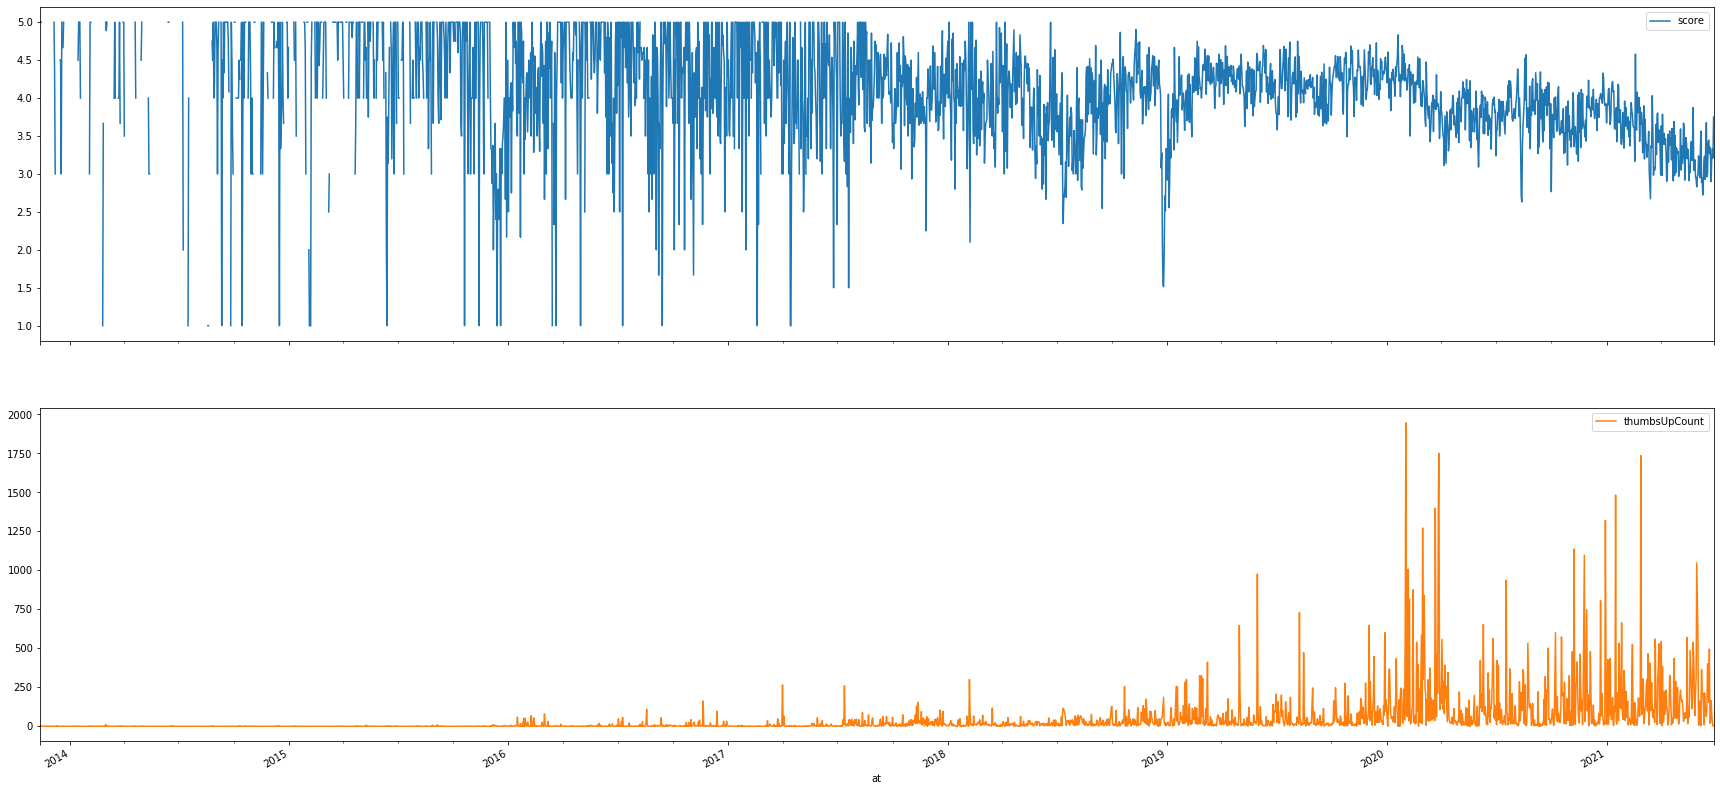

In [12]:
#Understand the daily ratings (With reviews)
#df_daily_rws = df_app_reviews.resample('D').agg({'score': 'mean', 'thumbsUpCount':'sum'})
df_daily_rws_all = df_app_reviews.set_index('at').resample('D').agg({'score': 'mean','thumbsUpCount': 'sum'})
df_daily_rws_all.reset_index(inplace=True) #This will effect on time series data visualizations. Therefore, I keep 'at' column as my index. 
df_daily_rws_all['Day of Week'] = df_daily_rws_all['at'].dt.day_name()
df_daily_rws_all.set_index('at', inplace = True)
#Visualize the data
df_daily_rws_all.plot(subplots = True, figsize = (30, 15))
plt.show()

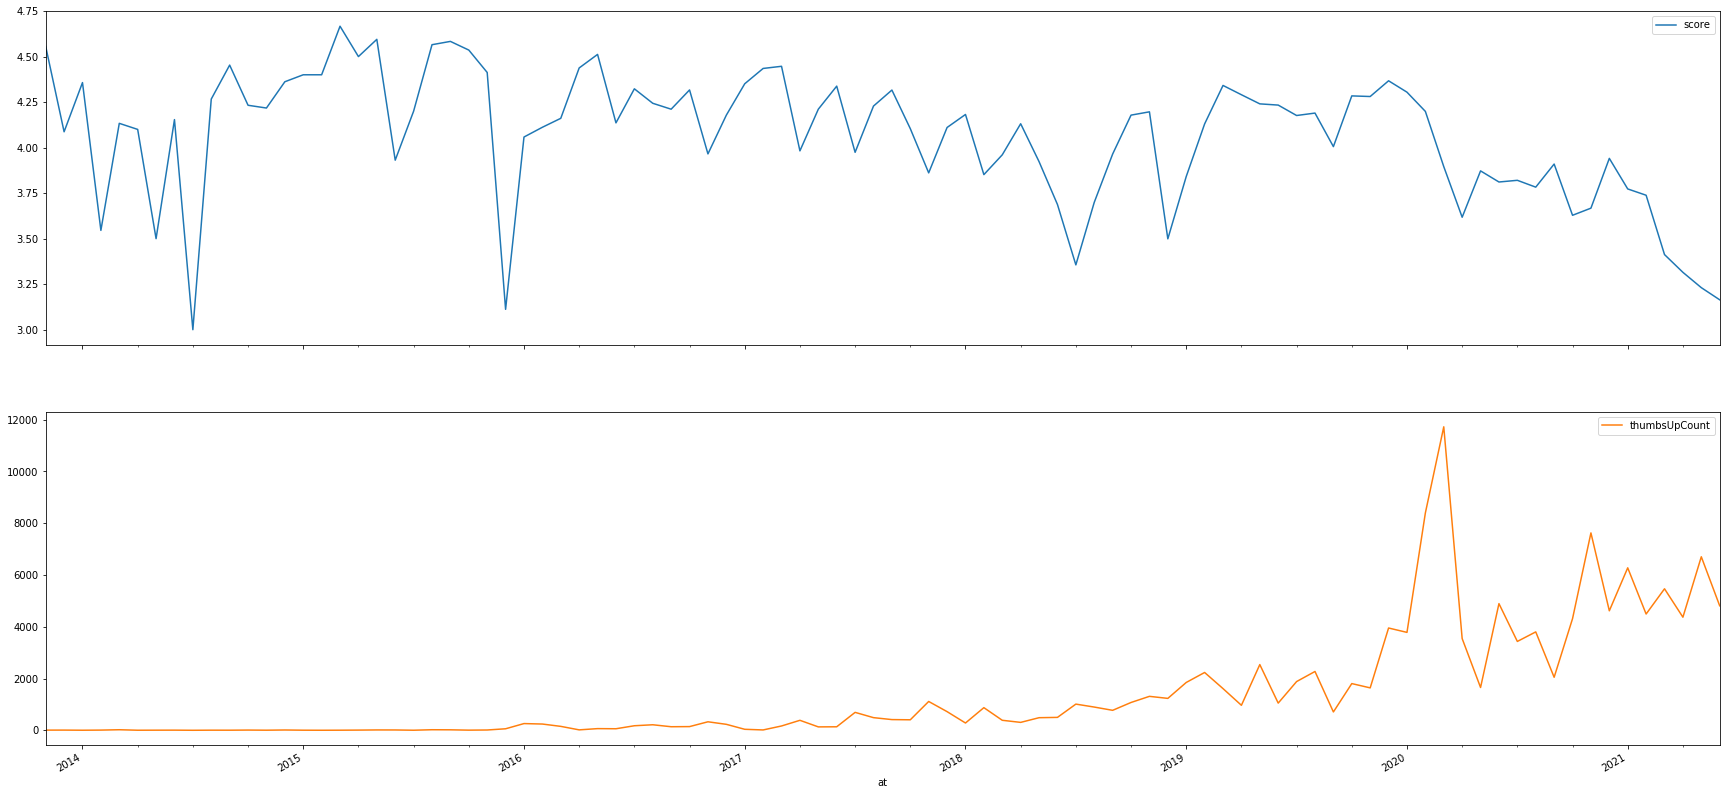

In [13]:
#Plotting the same in Monthly data df_monthly_rws_all
df_monthly_rws_all = df_app_reviews.set_index('at').resample('M').agg({'score': 'mean','thumbsUpCount': 'sum'})
df_monthly_rws_all.reset_index(inplace=True) #This will effect on time series data visualizations. Therefore, I keep 'at' column as my index. 
df_monthly_rws_all['Day of Week'] = df_monthly_rws_all['at'].dt.day_name()
df_monthly_rws_all.set_index('at', inplace = True)
df_monthly_rws_all.plot(subplots = True, figsize = (30, 15))
plt.show()

### Comment for the above two visualizations: We can observe that overall, the app users tend to give more negative reviews with the pandemic (after 2020 Jan). Also, the thumbs-up count increases drastically with the pandemic. It means more users are reading what other people have written and, they are agreeing with the original post. With the increase of negative posts, the number of negative e-word of mouth will be increased. 
(Need to analyze this further by considering negative ratings thumbs count behavior and each analysis for each product.) 

In [14]:
df_app_reviews['Day of Week'] = df_app_reviews['at'].dt.day_name()
df_app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,App Name,Day of Week
0,gp:AOqpTOEuEW3KubyrOny8vsguTu85tt1yfzPMTEuHnUD...,Sumith Nandana,https://play-lh.googleusercontent.com/a-/AOh14...,Good application Good service,5,0,1.3.2,2021-06-28 15:32:40,None,NaT,MySLT,Monday
1,gp:AOqpTOFVP-WRdOr7oVlRWJw7BncBF3rm7t7Sxqig0qo...,Alexis benildus fernando,https://play-lh.googleusercontent.com/a-/AOh14...,Very good app. I can add data ad on easily via...,5,0,1.3.2,2021-06-28 07:30:02,None,NaT,MySLT,Monday
2,gp:AOqpTOG0llwGRPp9QVUo3e12Td8OAFSFAHbOOPQcVRl...,Diwya Kandasamy,https://play-lh.googleusercontent.com/a-/AOh14...,Useless service.,1,0,1.3.2,2021-06-27 13:35:42,None,NaT,MySLT,Sunday
3,gp:AOqpTOGdFYFo1afMbhj0v1Cn6Q2z671ixsOgdOJwqBN...,Ahamed Arshad,https://play-lh.googleusercontent.com/a/AATXAJ...,App always says something went wrong. GB purch...,1,0,None,2021-06-27 10:01:24,None,NaT,MySLT,Sunday
4,gp:AOqpTOG0-ZAfnZlOxDNXBYf2B1nHy4C4-CWRFD3vkHJ...,Chamikara Yahampath,https://play-lh.googleusercontent.com/a/AATXAJ...,it has many bugs,1,0,1.3.2,2021-06-27 09:55:58,None,NaT,MySLT,Sunday


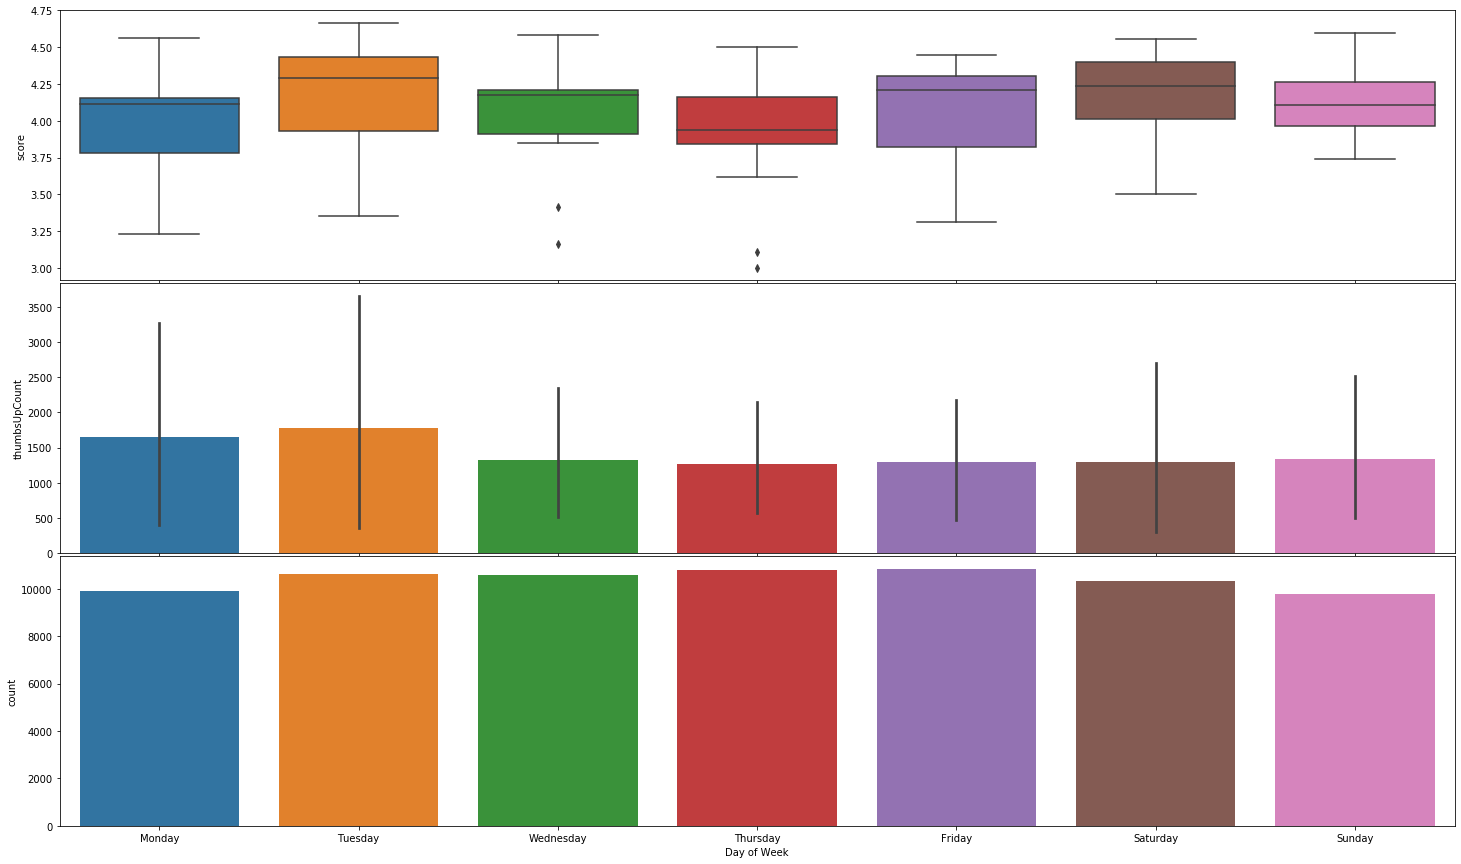

In [15]:
fig, ax1 = plt.subplots(figsize = (25,15), nrows = 3, ncols = 1, sharex=True)
dorder = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig1 = sns.boxplot(x='Day of Week', y = 'score', data =df_monthly_rws_all, order = dorder, ax = ax1[0])
fig2 = sns.barplot(x='Day of Week', y = 'thumbsUpCount', data =df_monthly_rws_all, ax = ax1[1], order = dorder)
fig3 = sns.countplot(x='Day of Week', data =df_app_reviews, ax = ax1[2], order = dorder)
fig1.set(xlabel=None)
plt.subplots_adjust(hspace = 0.01)
plt.show()

### As per above count plot, most people have logged their reviews on Tuesday but it has even distribution. However, those who lodged their errors on Tuesdays seems happy and they have given higher ratings relatively. 
## App Wise User Ratings Visualizations

In [16]:
# App Wise Data | Daily App wise data for each app 
df_byday_app_rws = df_app_reviews.set_index('at').groupby(['App Name']).resample('D').agg({'score': 'mean','thumbsUpCount': 'sum'})
df_byday_app_rws.reset_index(inplace=True) #As previous, I need to set 'at' column as my index. Therefore I will add the relavent code helow this line. 
df_byday_app_rws['Day of Week'] = df_byday_app_rws['at'].dt.day_name()
df_byday_app_rws.set_index('at', inplace = True)
df_byday_app_rws

,App Name,score,thumbsUpCount,Day of Week
at,,,,
2017-10-28,Hutch App,4.863636,31,Saturday
2017-10-29,Hutch App,4.800000,3,Sunday
2017-10-30,Hutch App,4.800000,11,Monday
2017-10-31,Hutch App,2.750000,26,Tuesday
2017-11-01,Hutch App,4.333333,6,Wednesday
...,...,...,...,...
2021-06-23,cliQ,3.750000,0,Wednesday
2021-06-24,cliQ,2.000000,0,Thursday
2021-06-25,cliQ,4.000000,0,Friday


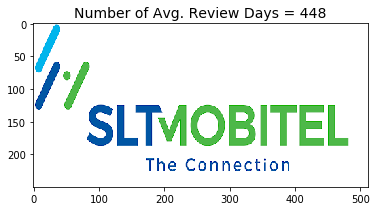

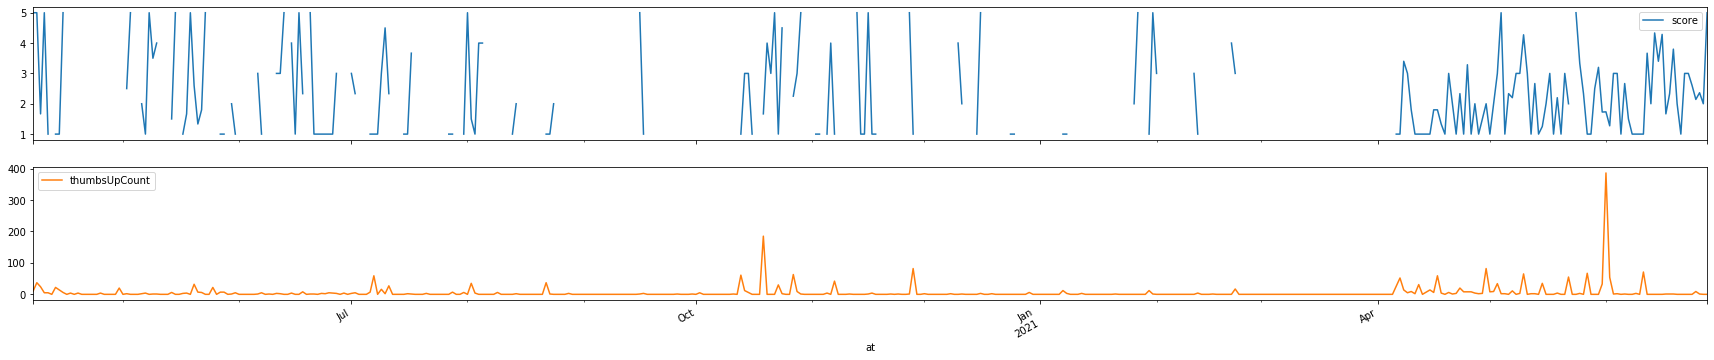

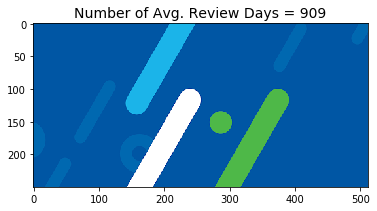

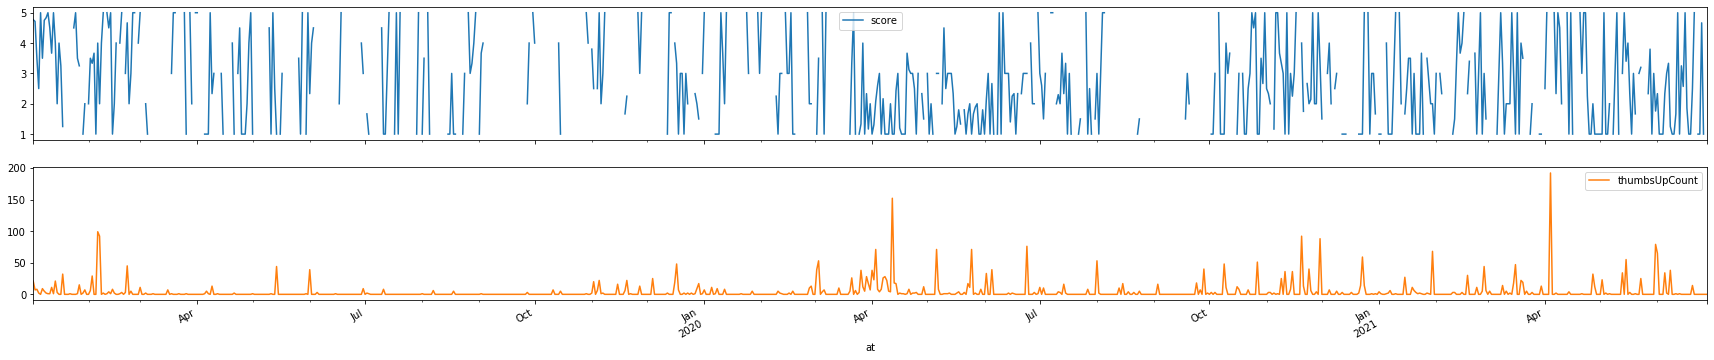

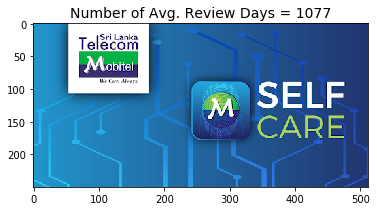

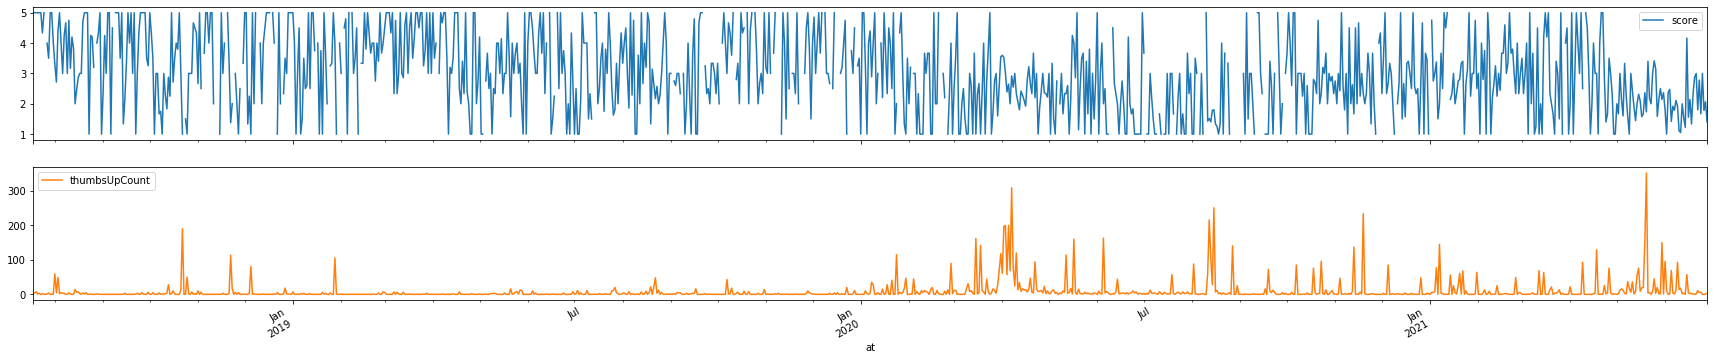

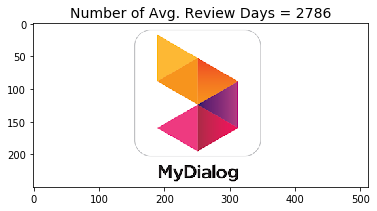

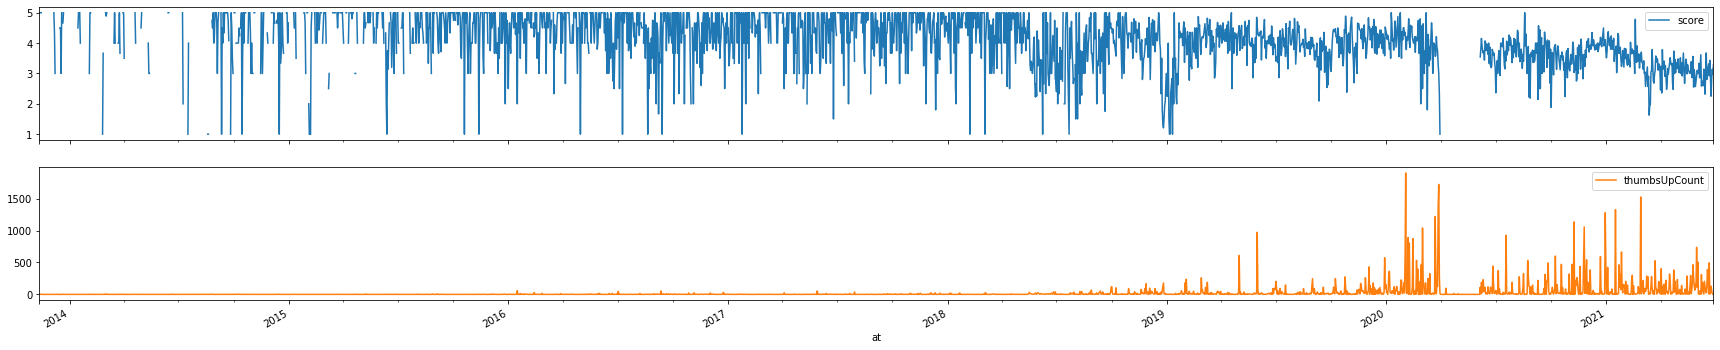

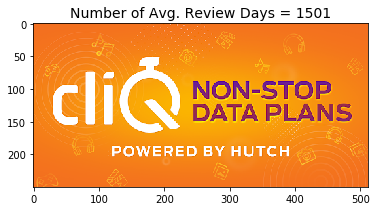

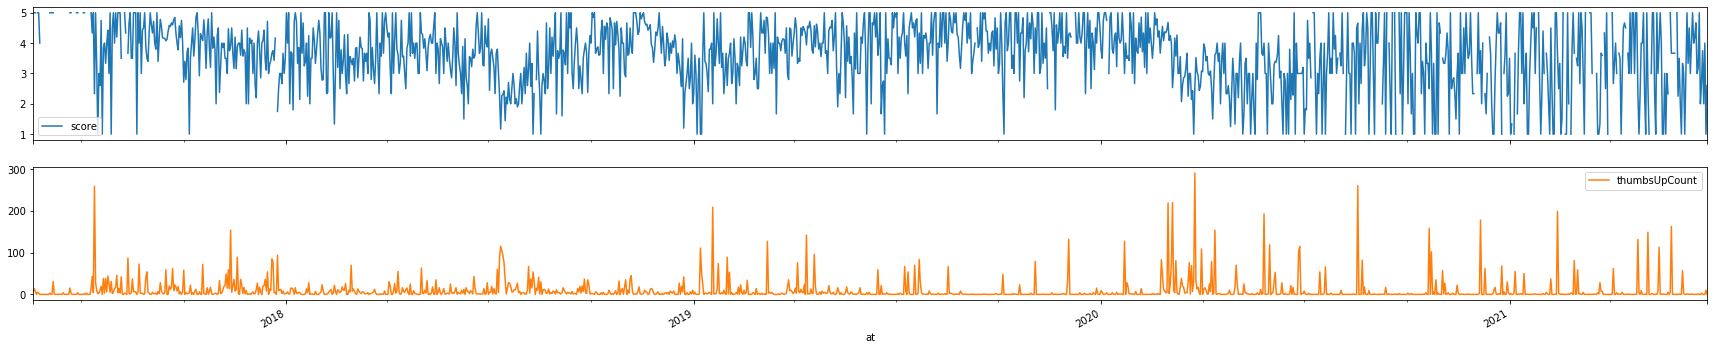

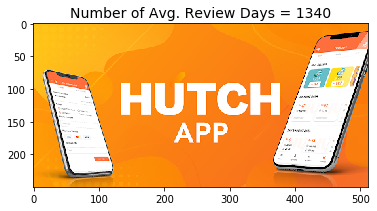

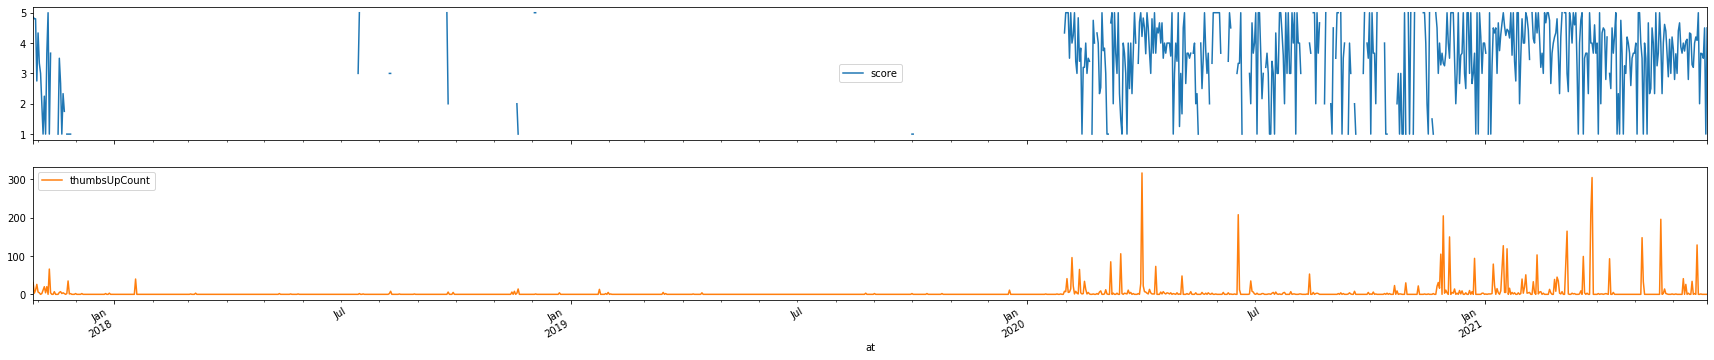

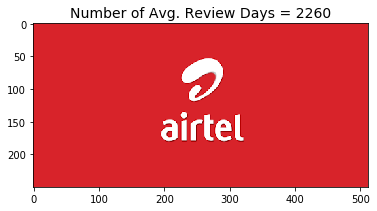

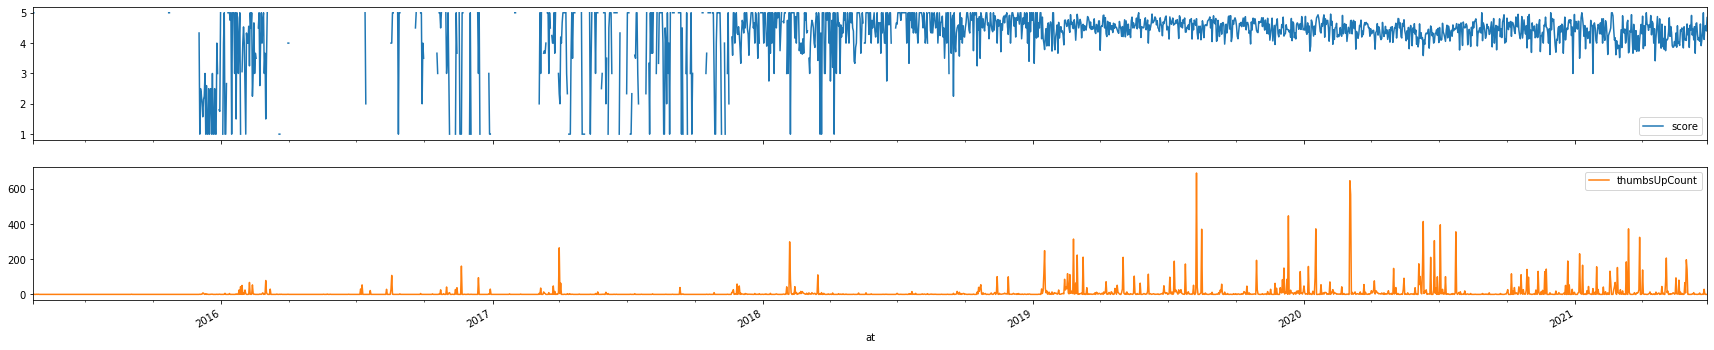

In [17]:
#Daily Reviews - Visualization
import numpy as np
i_app = 0
for app in  app_packages:
    df_app_1 = df_byday_app_rws['App Name'] == df_app_info['title'][i_app]
    df_app_1 = df_byday_app_rws[df_app_1]
    
    f = df_app_info['headerImage'][i_app] #Display App Logo and Name
    a = plt.imread(f)
    plt.imshow(a)
    plt.title('Number of Avg. Review Days = '+ str(len(df_app_1)), fontsize =14)
    plt.show()
      
    df_app_1.plot(subplots = True, figsize = (30, 6))
    plt.show()
    print('')
    i_app +=1

In [18]:
# App Wise Data | Monthly App wise data for each app 
df_bymonth_app_rws = df_app_reviews.set_index('at').groupby(['App Name']).resample('M').agg({'score': 'mean','thumbsUpCount': 'sum'})
df_bymonth_app_rws.reset_index(inplace=True) #As previous, I need to set 'at' column as my index. Therefore I will add the relavent code helow this line. 
df_bymonth_app_rws['Day of Week'] = df_bymonth_app_rws['at'].dt.day_name()
df_bymonth_app_rws.set_index('at', inplace = True)
df_bymonth_app_rws

,App Name,score,thumbsUpCount,Day of Week
at,,,,
2017-10-31,Hutch App,4.466667,71,Tuesday
2017-11-30,Hutch App,2.574468,204,Thursday
2017-12-31,Hutch App,3.000000,9,Sunday
2018-01-31,Hutch App,4.000000,40,Wednesday
2018-02-28,Hutch App,NaN,0,Wednesday
...,...,...,...,...
2021-02-28,cliQ,2.920635,334,Sunday
2021-03-31,cliQ,3.176471,116,Wednesday
2021-04-30,cliQ,3.612903,218,Friday


In [19]:
df_number_of_reviews

,Total Number of Reviews,No. of Days App Online,App Name,Avg. Reviews Per Day
0,601,446,MySLT,1.34753
1,1346,908,SLT Broadband,1.48238
2,4300,1075,Mobitel Selfcare,4
3,31291,2784,MyDialog,11.2396
4,7706,1499,cliQ,5.14076
5,1857,1339,Hutch App,1.38686
6,25736,2258,My Airtel,11.3977


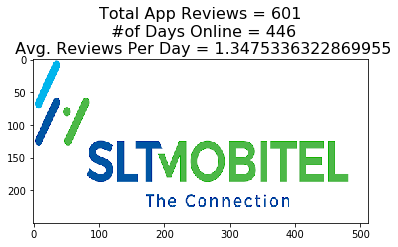

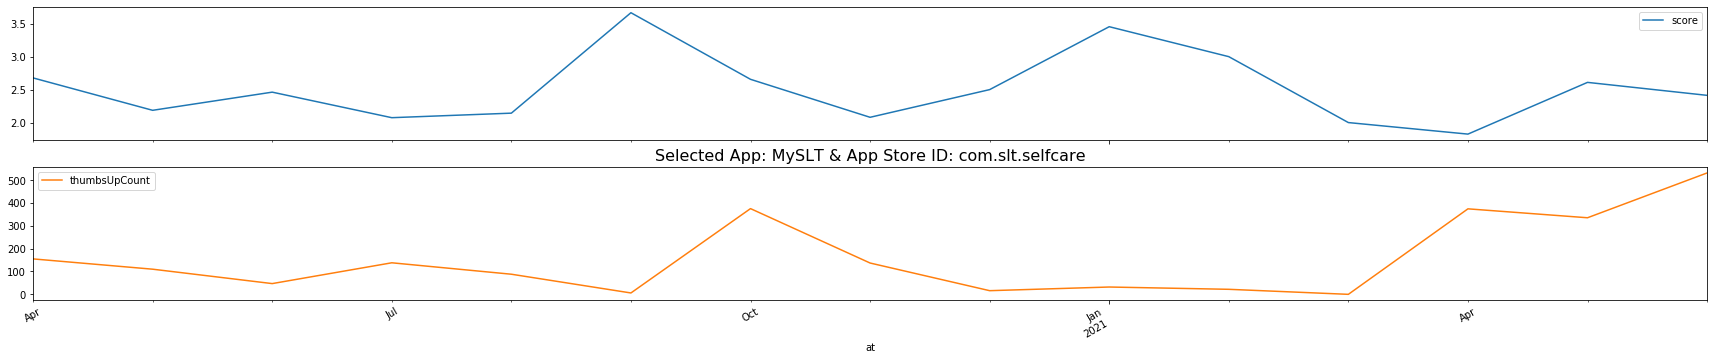

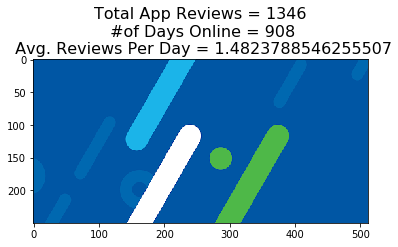

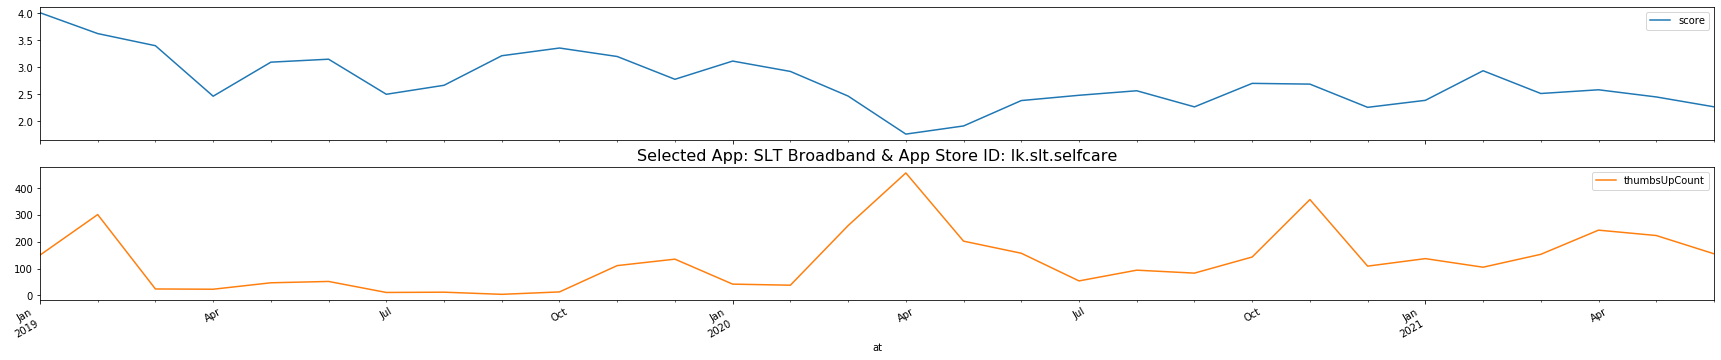

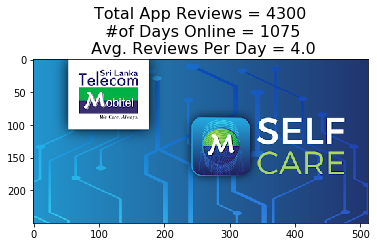

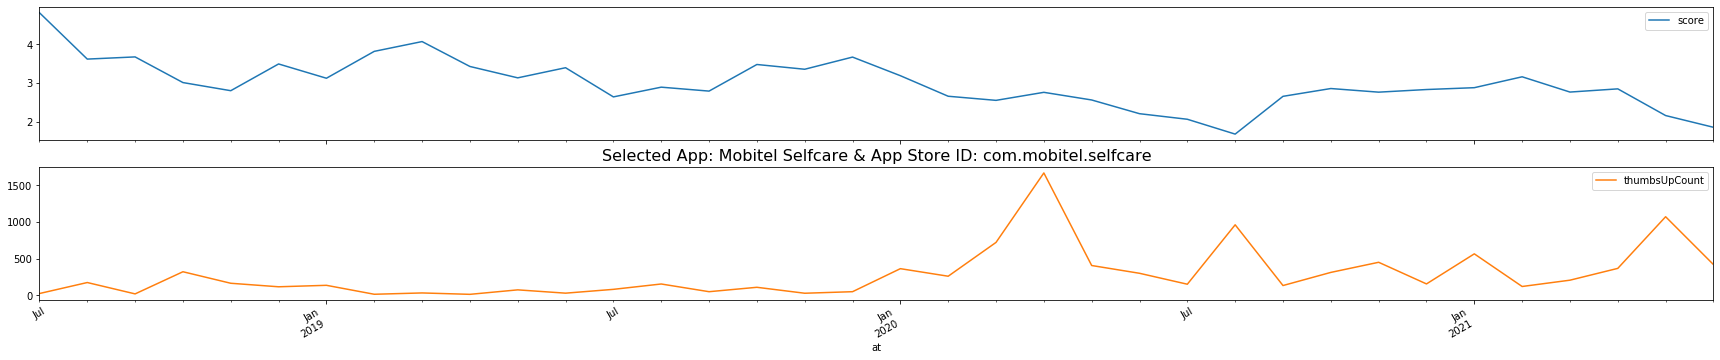

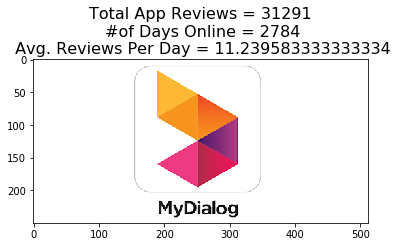

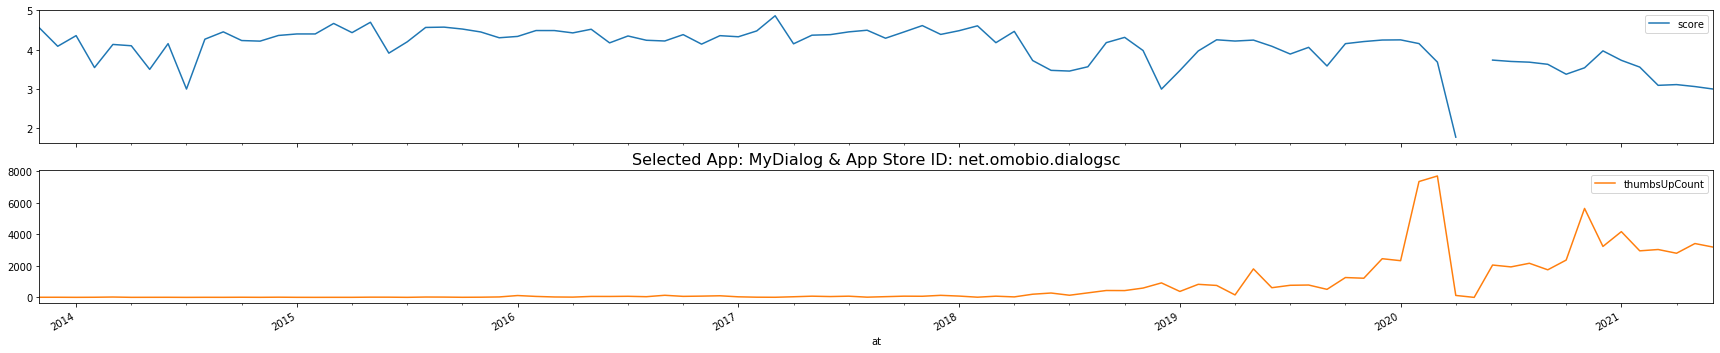

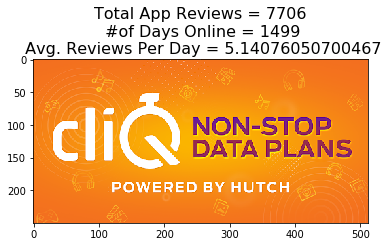

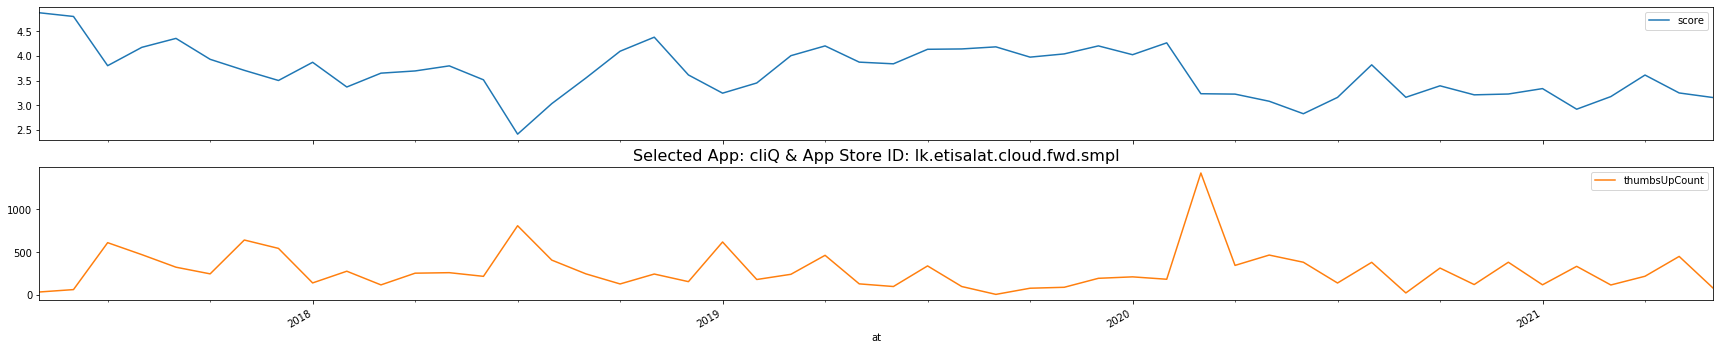

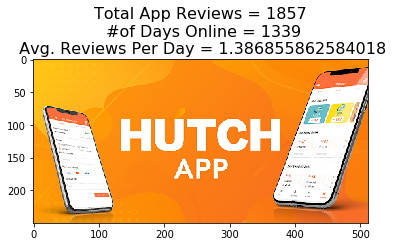

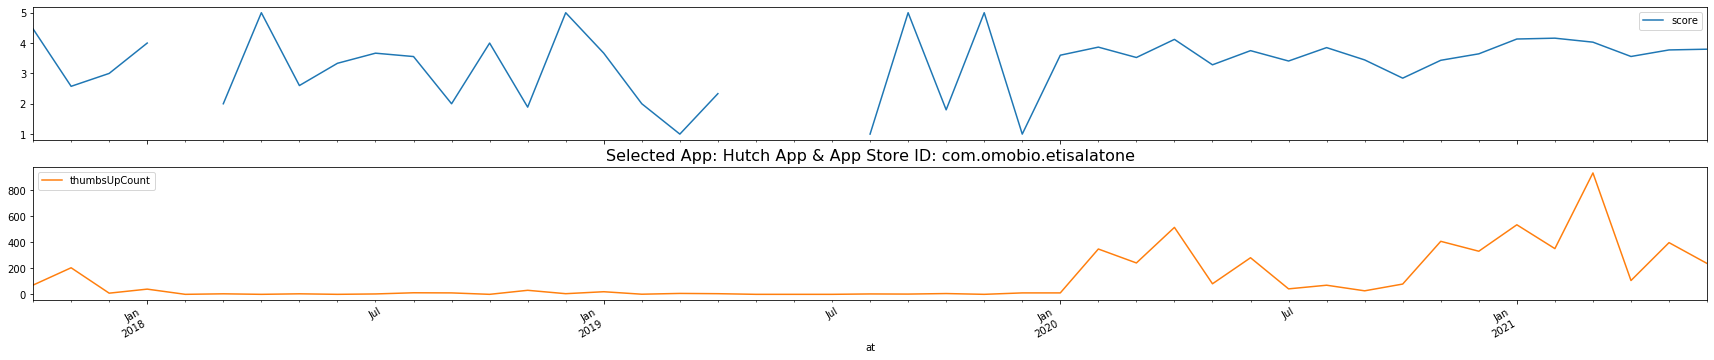

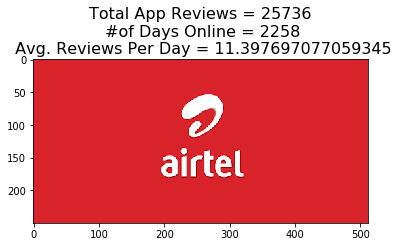

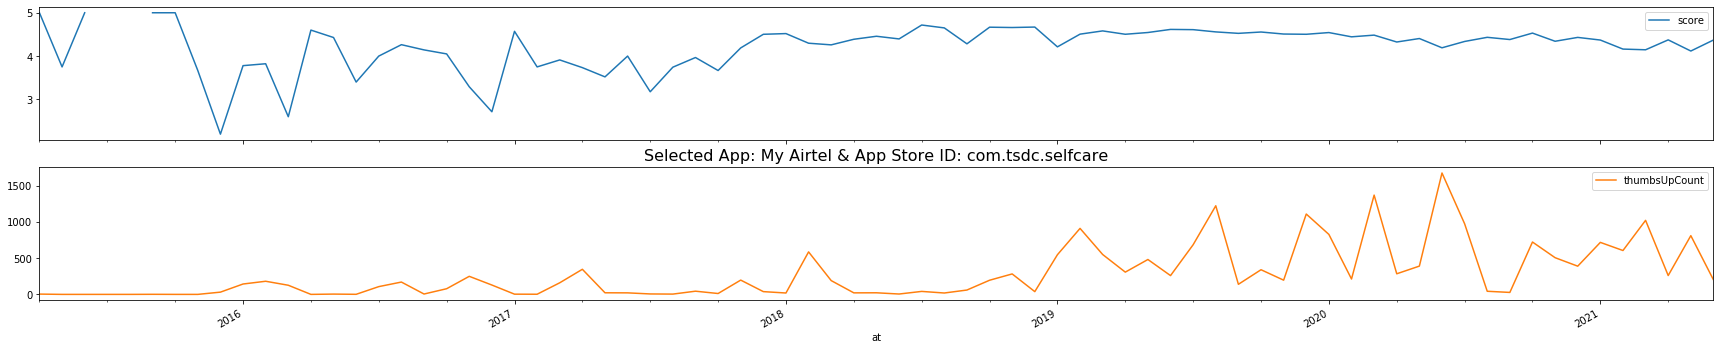

In [20]:
ii_app = 0
for app in  app_packages:
    df_app_2 = df_bymonth_app_rws['App Name'] == df_app_info['title'][ii_app]
    df_app_2 = df_bymonth_app_rws[df_app_2]
    
    f = df_app_info['headerImage'][ii_app] #Display App Logo and Name
    a = plt.imread(f)
    plt.imshow(a)
    plt.title('Total App Reviews = '+ str(df_number_of_reviews['Total Number of Reviews'][ii_app]) + '\n #of Days Online = ' +  str(df_number_of_reviews['No. of Days App Online'][ii_app]) + '\n Avg. Reviews Per Day = ' + str(df_number_of_reviews['Avg. Reviews Per Day'][ii_app])  , fontsize =16)
    plt.show()
    
    df_app_2.plot(subplots = True, figsize = (30, 6))
    plt.title('Selected App: '+df_app_info['title'][ii_app] + ' & App Store ID: '+app, fontsize =16)
    plt.show()
    print('')
    ii_app +=1

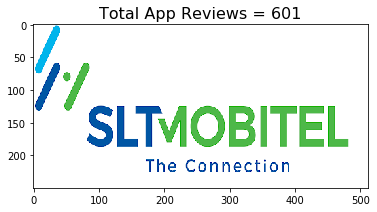

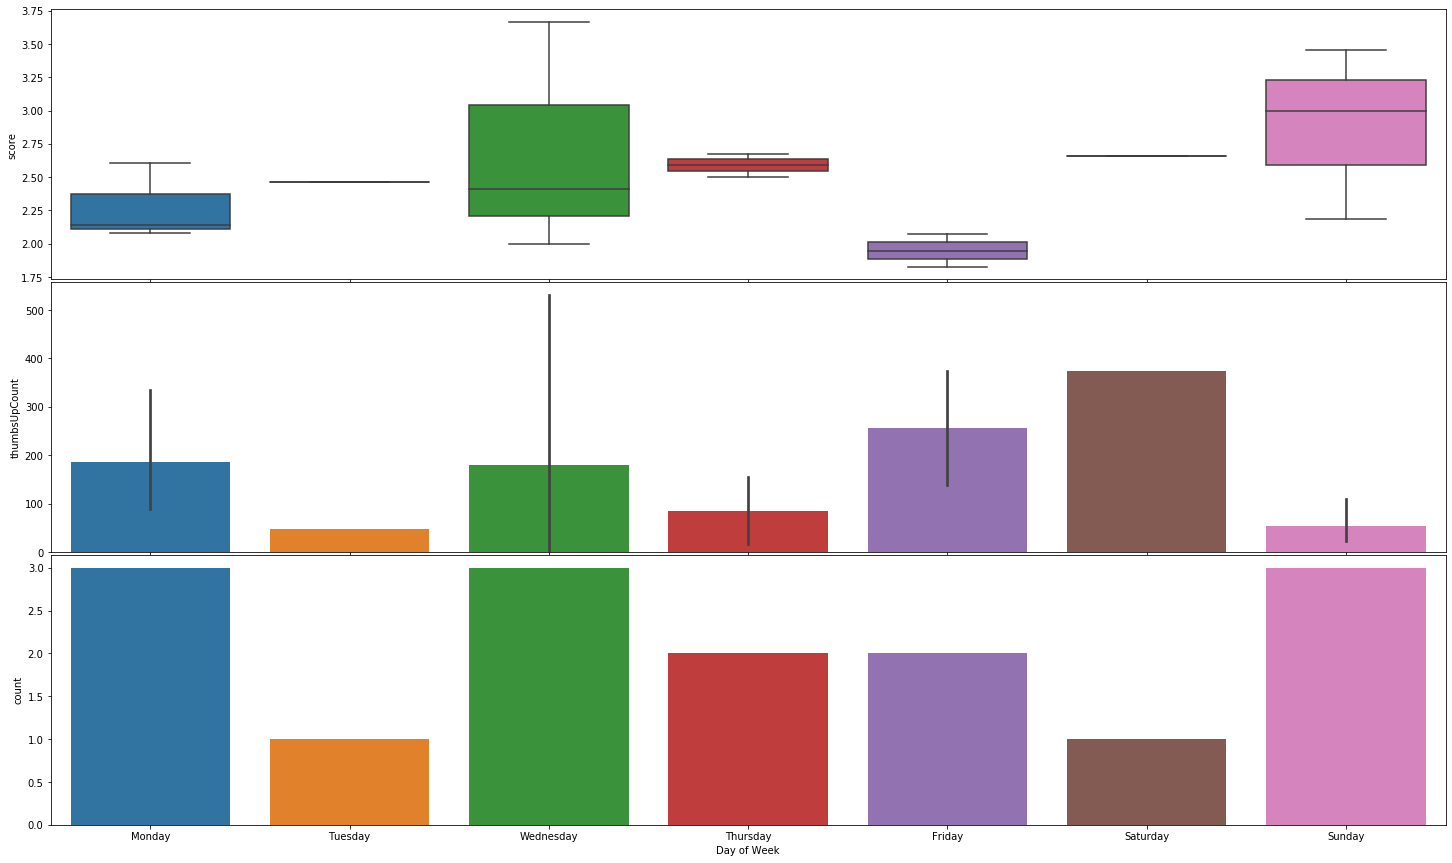

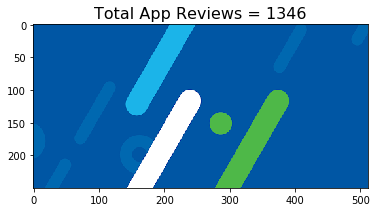

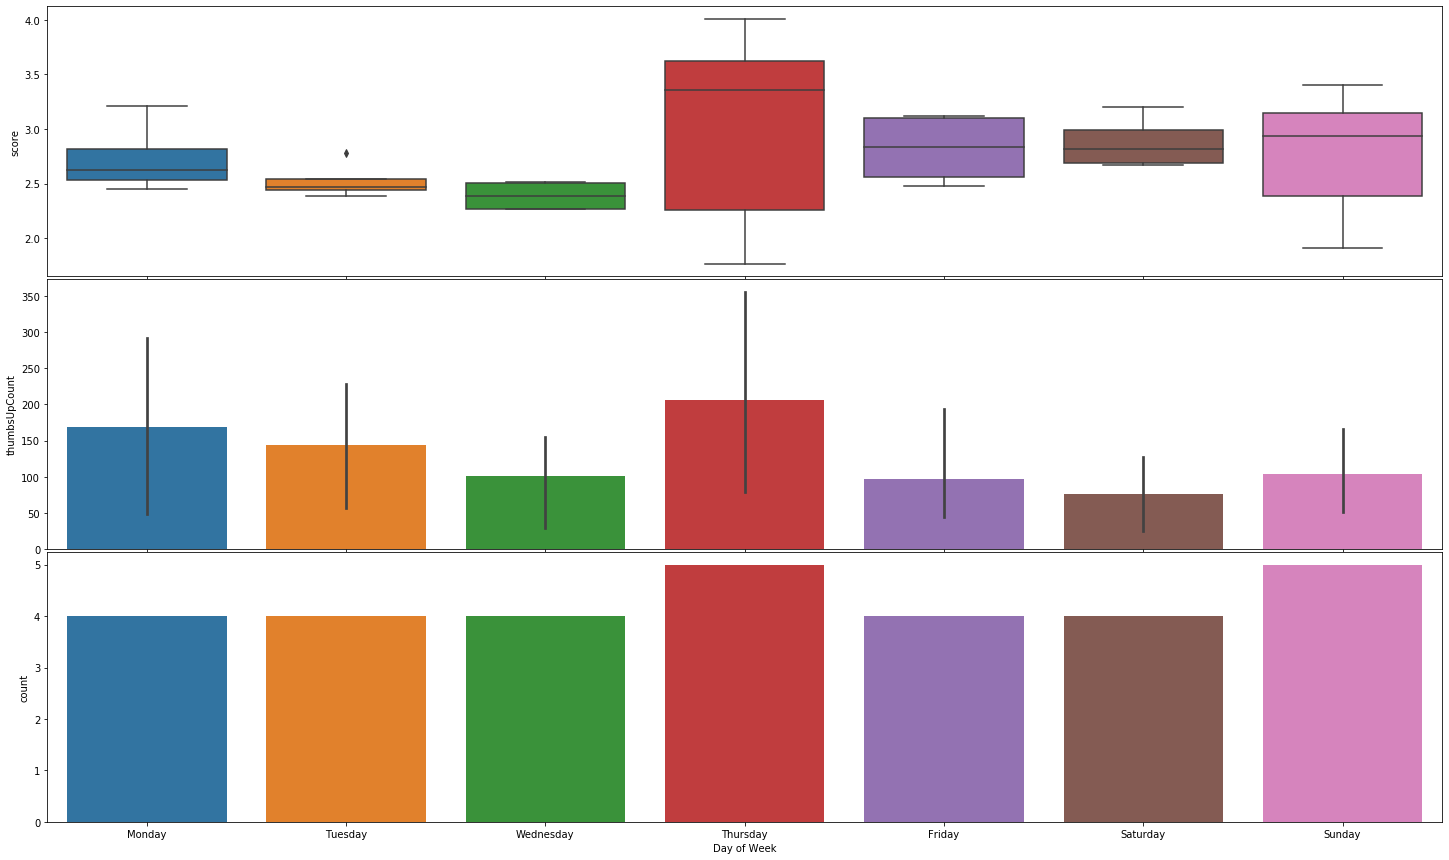

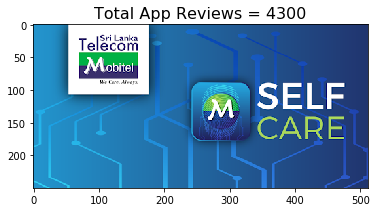

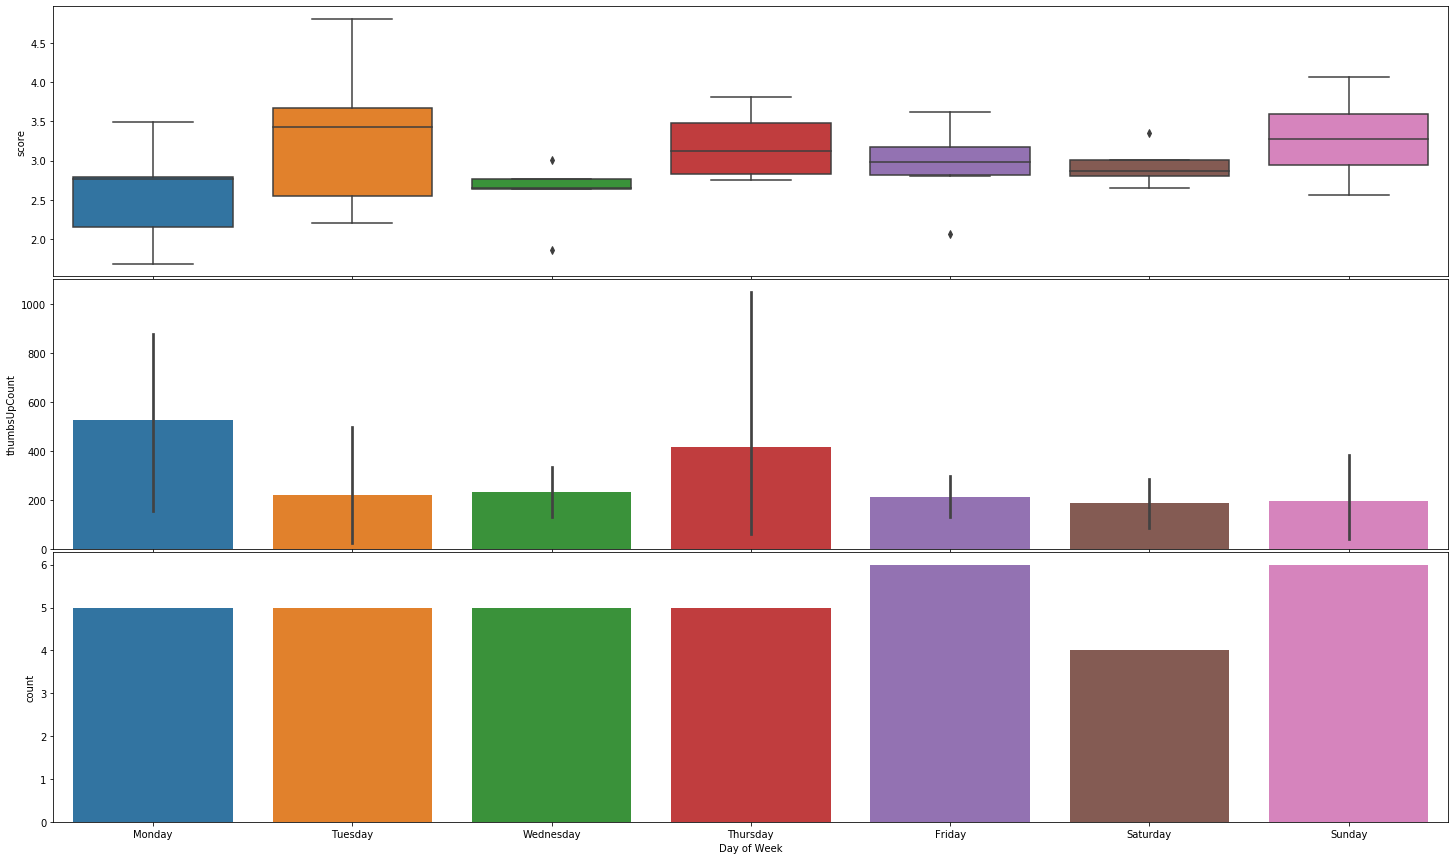

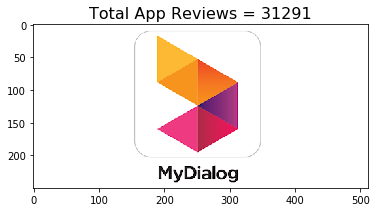

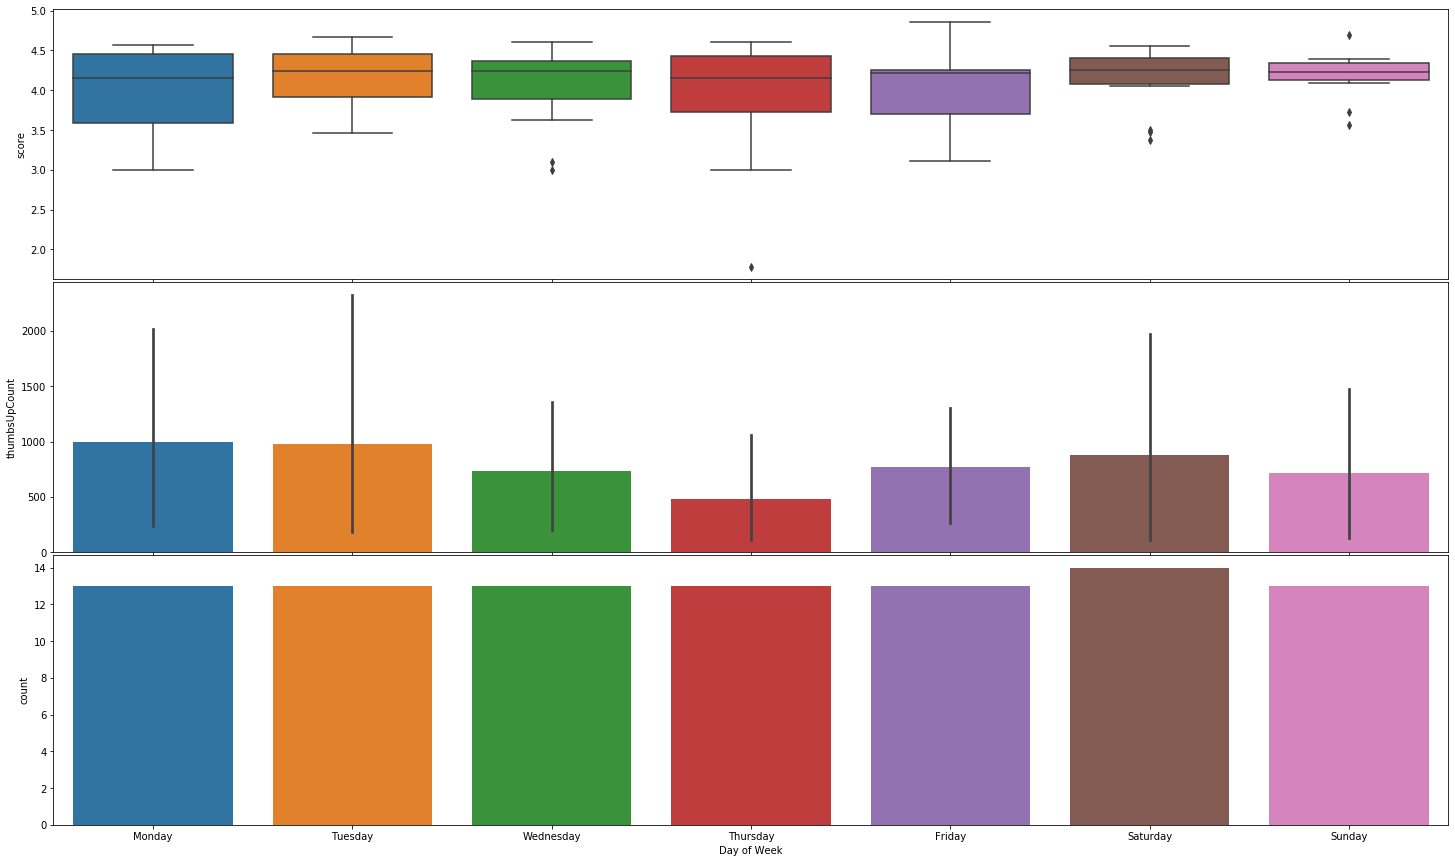

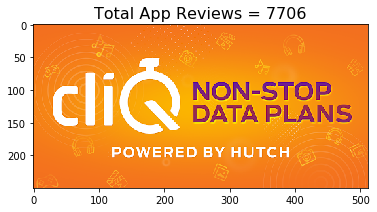

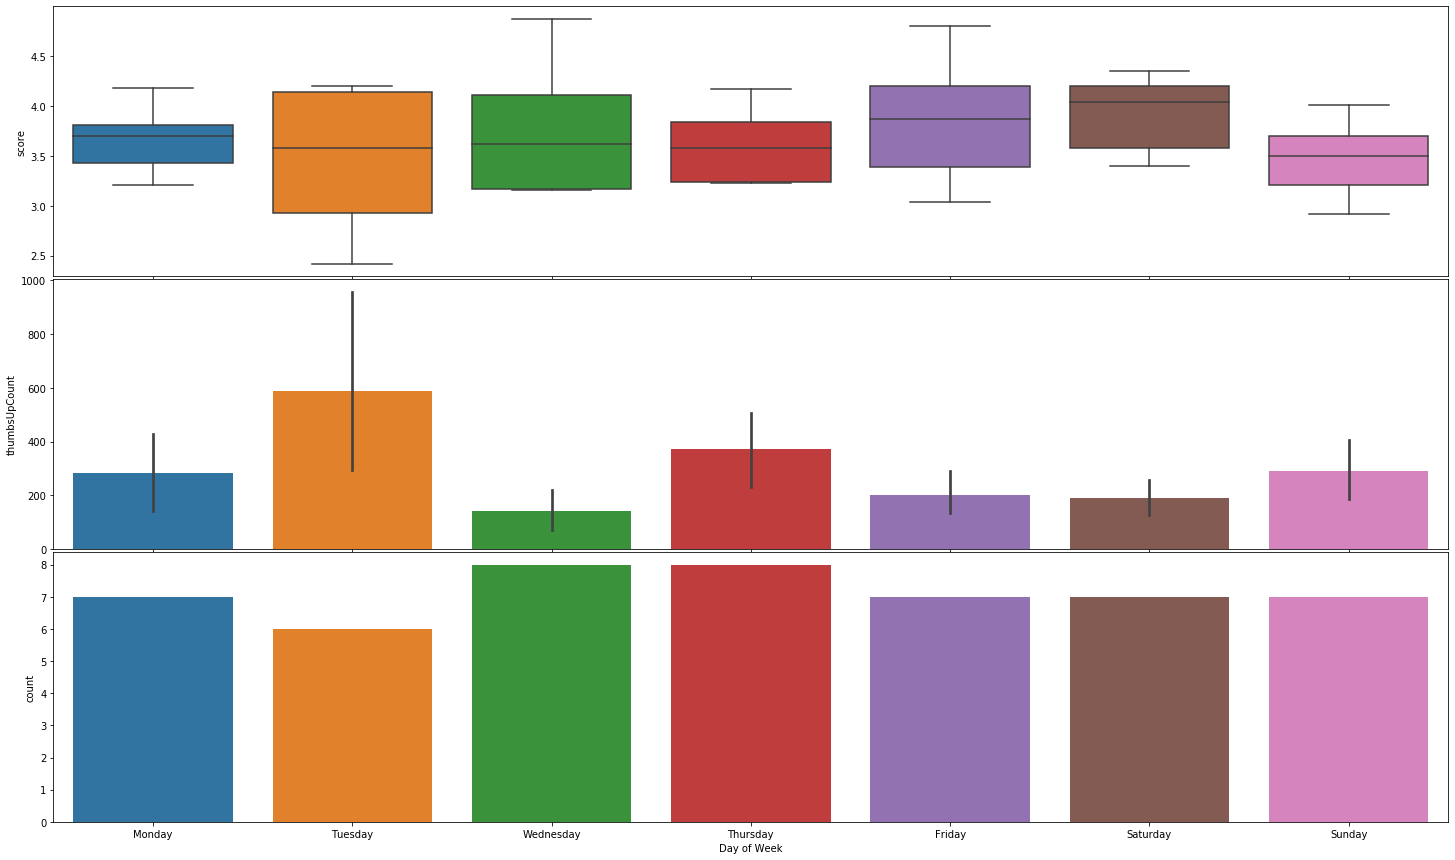

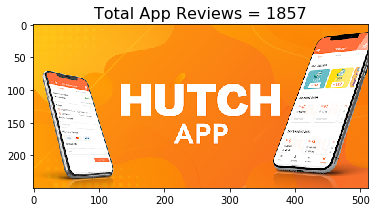

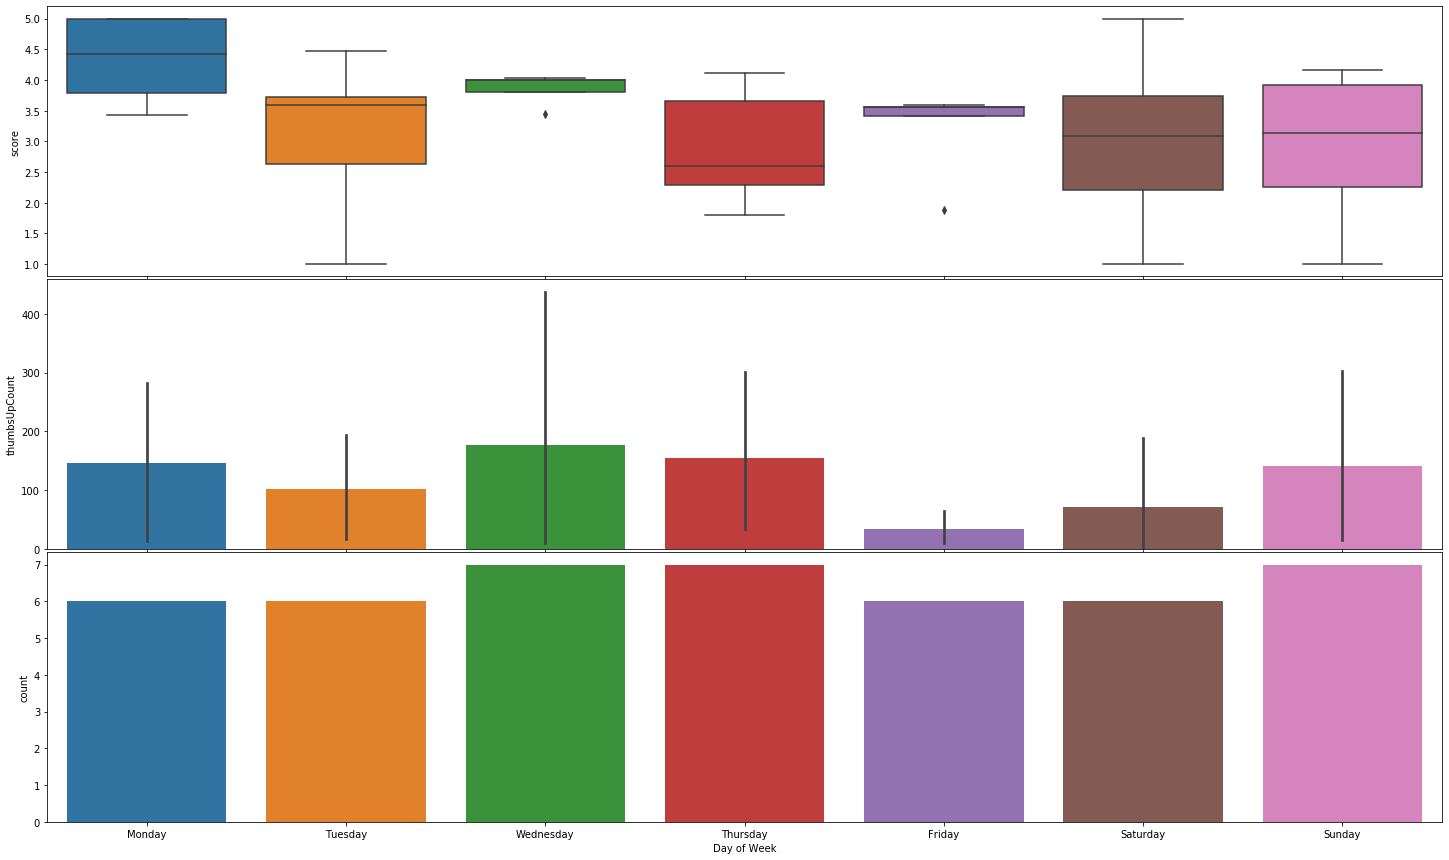

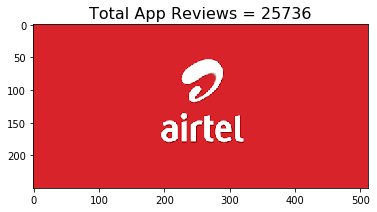

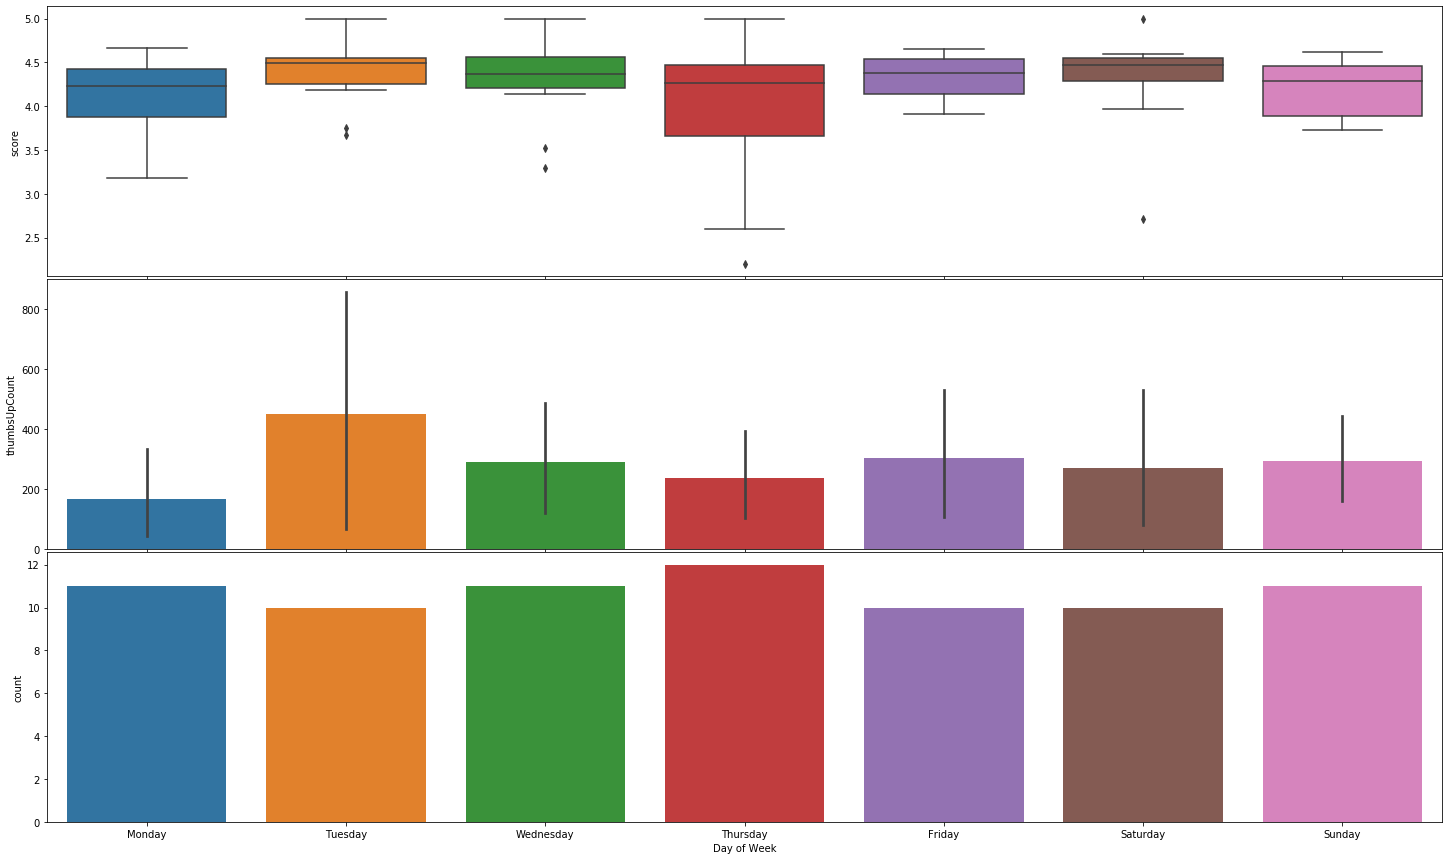

In [21]:
iii_app = 0
for app in  app_packages:
    df_app_3 = df_bymonth_app_rws['App Name'] == df_app_info['title'][iii_app]
    df_app_3 = df_bymonth_app_rws[df_app_3]
    
    f = df_app_info['headerImage'][iii_app] #Display App Logo
    a = plt.imread(f)
    plt.imshow(a)
    plt.title('Total App Reviews = '+ str(num_of_rws[iii_app]) , fontsize =16)
    plt.show()
    
    fig, ax1 = plt.subplots(figsize = (25,15), nrows = 3, ncols = 1, sharex=True)
    dorder = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    fig1 = sns.boxplot(x='Day of Week', y = 'score', data =df_app_3, order = dorder, ax = ax1[0])
    fig2 = sns.barplot(x='Day of Week', y = 'thumbsUpCount', data =df_app_3, ax = ax1[1], order = dorder)
    fig3 = sns.countplot(x='Day of Week', data =df_app_3, ax = ax1[2], order = dorder)
    fig1.set(xlabel=None)
    plt.subplots_adjust(hspace = 0.01)
    plt.show()
    print('')
    iii_app +=1

# Conclusions
### SLT, Mobitel and Dialog apps shows negative trend in reviews while Airtel and Hutch are maintaining overall a higher review rate. 
### Overall Ratings and Thumbs Up count shows a Trend and Cyclical component before the pandemic hits but after 2020 Q1, the dataset shows an irregular component with daily mean. When it comes to the monthly mean ratings and total thumbsup count, we can see that there is a trend component.

## Next: Time Series Forecasting and Sentiment Analysis on Customer Comments. 